### 4) Read the image shown below. 
### Call it I_low. Now extract the foreground (single flower) using Otsu’s threshold, T_low. Run Histogram Equalization of I_low to obtain a new image I_HE. Now  again extract the foreground (single flower) using Otsu’s threshold, T_high. Compare the results.

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Read the image , Call it I_low

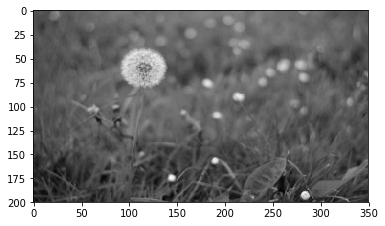

In [9]:
I_low = cv2.imread('./images/4.png',0)     # this will load as gray scale image (imgname,0)

plt.imshow(I_low, cmap = 'gray')

### Now extract the foreground (single flower) using Otsu’s threshold, T_low.

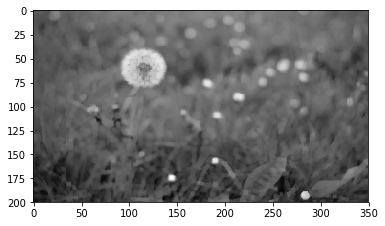

In [10]:
import cv2 as cv
import numpy as np

kernel = np.ones((3,3),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 2)

opening = cv.morphologyEx(I_low, cv.MORPH_OPEN, kernel)

plt.imshow(opening, cmap = 'gray')

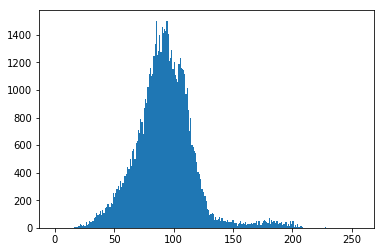

In [11]:
# we apply otsu's thresholding when the image is bimodal : means two peaks in the histogram but here it is not the case
# so first we hv to make an image bimodal

plt.hist(opening.ravel(),256,[0,256]); plt.show()

In [12]:
# preprocessing 

x = np.array(opening)
x.shape
x_bck = x


# taking exponential function and then normalizing 
x = x/255
x = np.exp(x)
minx  = np.min(x)
maxx = np.max(x)
x = x - minx / (maxx - minx)
x = x*255
print(x)

#x1 = np.log(x)
#x1 = (1/x1) * 255
#x1 = (-1) * x1
#print(x1)

[[168.66021648 168.66021648 168.66021648 ... 174.33098257 174.33098257
  172.90494082]
 [168.66021648 168.66021648 168.66021648 ... 174.33098257 174.33098257
  172.90494082]
 [168.66021648 168.66021648 167.25636948 ... 174.33098257 174.33098257
  172.90494082]
 ...
 [101.34770559 101.34770559  93.45807439 ... 114.19167978 110.63365237
  109.45691492]
 [ 93.45807439  93.45807439  93.45807439 ... 114.19167978 114.19167978
  114.19167978]
 [ 93.45807439  93.45807439  93.45807439 ... 114.19167978 114.19167978
  114.19167978]]


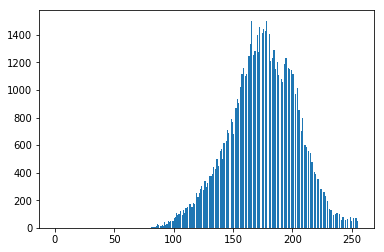

In [13]:
#y = np.exp(np.array(nimg))
#print(y)

plt.hist(x.ravel(),256,[0,256]); plt.show()
x.shape
x = x.astype(np.uint8)

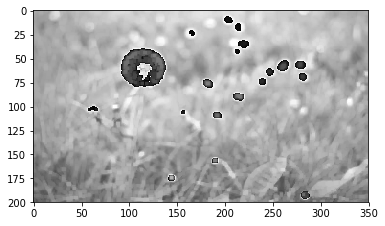

In [14]:
plt.imshow(x , cmap = 'gray')

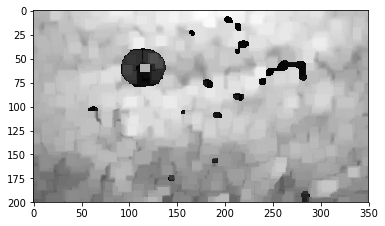

In [15]:
kernel = np.ones((9,9),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 2)

openingx = cv.morphologyEx(x, cv.MORPH_OPEN, kernel)

plt.imshow(openingx, cmap = 'gray')

In [16]:
# before applying hist eq / otsu's th : we hv to convert an image to grayscale

#I_low_gray = cv2.cvtColor( I_low, cv2.COLOR_BGR2GRAY );  # to convert an image to grayscale

#plt.imshow(I_low_gray)
#plt.hist(I_low_gray.ravel(),256,[0,256]); plt.show()


158.0


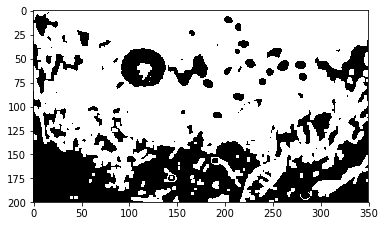

In [20]:
# blur = cv2.GaussianBlur(I_low_gray,(9,9),0)

ret2,th2 = cv2.threshold(x,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2) # threshold val decided by otsu's algo
plt.imshow(th2 , cmap = 'gray')

# SEPERATING foreground and background

back = x - th2
#plt.imshow(back , cmap = 'gray')

### Run Histogram Equalization of I_low to obtain a new image I_HE. Now  again extract the foreground (single flower) using Otsu’s threshold, T_high.

In [21]:
# applying hist equalization: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

I_HE = cv2.equalizeHist(openingx)

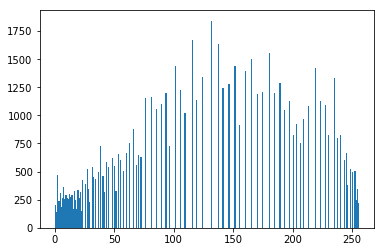

In [22]:
plt.hist(I_HE.ravel(),256,[0,256]); plt.show()

124.0


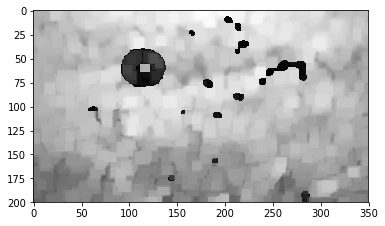

In [23]:
ret2,th2 = cv2.threshold(I_HE,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2)
print(ret2)
back = openingx - th2
plt.imshow(back , cmap = 'gray')

### Observation : For otsu method we need a bimodal image but the given image is not bimodal , so i tried some preprocessing like exponential 